In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot

In [0]:
training_path = "/content/drive/My Drive/Kaggle_disaster/train.csv"
testing_path = "/content/drive/My Drive/Kaggle_disaster/test.csv"
submission_file = "/content/sample_submission.csv" 

In [0]:
train_data = pd.read_csv(training_path)
test_data = pd.read_csv(testing_path)
submit_data = pd.read_csv(submission_file)

In [0]:
# Cleaning the data for the null values in the text column
train_data = train_data[train_data['text'].notna()]

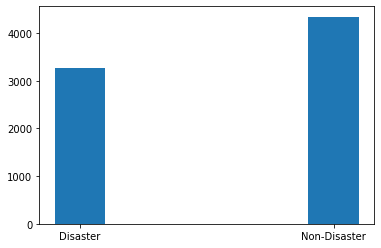

In [0]:
disasterCount = train_data[train_data['target'] == 1].shape[0]
nondisasterCount = train_data[train_data['target'] == 0].shape[0]
pyplot.bar(['Disaster', 'Non-Disaster'],[disasterCount, nondisasterCount], align = 'center', width = 0.2)
pyplot.show()

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [0]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
def preprocess(row):
  row.text = re.sub(r"\x89Û_", "", row.text)
  row.text = re.sub(r"\x89ÛÒ", "", row.text)
  row.text = re.sub(r"\x89ÛÓ", "", row.text)
  row.text = re.sub(r"\x89ÛÏWhen", "When", row.text)
  row.text = re.sub(r"\x89ÛÏ", "", row.text)
  row.text = re.sub(r"China\x89Ûªs", "China's", row.text)
  row.text = re.sub(r"let\x89Ûªs", "let's", row.text)
  row.text = re.sub(r"\x89Û÷", "", row.text)
  row.text = re.sub(r"\x89Ûª", "", row.text)
  row.text = re.sub(r"\x89Û\x9d", "", row.text)
  row.text = re.sub(r"å_", "", row.text)
  row.text = re.sub(r"\x89Û¢", "", row.text)
  row.text = re.sub(r"\x89Û¢åÊ", "", row.text)
  row.text = re.sub(r"fromåÊwounds", "from wounds", row.text)
  row.text = re.sub(r"åÊ", "", row.text)
  row.text = re.sub(r"åÈ", "", row.text)
  row.text = re.sub(r"JapÌ_n", "Japan", row.text)    
  row.text = re.sub(r"Ì©", "e", row.text)
  row.text = re.sub(r"å¨", "", row.text)
  row.text = re.sub(r"SuruÌ¤", "Suruc", row.text)
  row.text = re.sub(r"åÇ", "", row.text)
  row.text = re.sub(r"å£3million", "3 million", row.text)
  row.text = re.sub(r"åÀ", "", row.text)
    
  # Contractions
  row.text = re.sub(r"he's", "he is", row.text)
  row.text = re.sub(r"there's", "there is", row.text)
  row.text = re.sub(r"We're", "We are", row.text)
  row.text = re.sub(r"That's", "That is", row.text)
  row.text = re.sub(r"won't", "will not", row.text)
  row.text = re.sub(r"they're", "they are", row.text)
  row.text = re.sub(r"Can't", "Cannot", row.text)
  row.text = re.sub(r"wasn't", "was not", row.text)
  row.text = re.sub(r"don\x89Ûªt", "do not", row.text)
  row.text = re.sub(r"aren't", "are not", row.text)
  row.text = re.sub(r"isn't", "is not", row.text)
  row.text = re.sub(r"What's", "What is", row.text)
  row.text = re.sub(r"haven't", "have not", row.text)
  row.text = re.sub(r"hasn't", "has not", row.text)
  row.text = re.sub(r"There's", "There is", row.text)
  row.text = re.sub(r"He's", "He is", row.text)
  row.text = re.sub(r"It's", "It is", row.text)
  row.text = re.sub(r"You're", "You are", row.text)
  row.text = re.sub(r"I'M", "I am", row.text)
  row.text = re.sub(r"shouldn't", "should not", row.text)
  row.text = re.sub(r"wouldn't", "would not", row.text)
  row.text = re.sub(r"i'm", "I am", row.text)
  row.text = re.sub(r"I\x89Ûªm", "I am", row.text)
  row.text = re.sub(r"I'm", "I am", row.text)
  row.text = re.sub(r"Isn't", "is not", row.text)
  row.text = re.sub(r"Here's", "Here is", row.text)
  row.text = re.sub(r"you've", "you have", row.text)
  row.text = re.sub(r"you\x89Ûªve", "you have", row.text)
  row.text = re.sub(r"we're", "we are", row.text)
  row.text = re.sub(r"what's", "what is", row.text)
  row.text = re.sub(r"couldn't", "could not", row.text)
  row.text = re.sub(r"we've", "we have", row.text)
  row.text = re.sub(r"it\x89Ûªs", "it is", row.text)
  row.text = re.sub(r"doesn\x89Ûªt", "does not", row.text)
  row.text = re.sub(r"It\x89Ûªs", "It is", row.text)
  row.text = re.sub(r"Here\x89Ûªs", "Here is", row.text)
  row.text = re.sub(r"who's", "who is", row.text)
  row.text = re.sub(r"I\x89Ûªve", "I have", row.text)
  row.text = re.sub(r"y'all", "you all", row.text)
  row.text = re.sub(r"can\x89Ûªt", "cannot", row.text)
  row.text = re.sub(r"would've", "would have", row.text)
  row.text = re.sub(r"it'll", "it will", row.text)
  row.text = re.sub(r"we'll", "we will", row.text)
  row.text = re.sub(r"wouldn\x89Ûªt", "would not", row.text)
  row.text = re.sub(r"We've", "We have", row.text)
  row.text = re.sub(r"he'll", "he will", row.text)
  row.text = re.sub(r"Y'all", "You all", row.text)
  row.text = re.sub(r"Weren't", "Were not", row.text)
  row.text = re.sub(r"Didn't", "Did not", row.text)
  row.text = re.sub(r"they'll", "they will", row.text)
  row.text = re.sub(r"they'd", "they would", row.text)
  row.text = re.sub(r"DON'T", "DO NOT", row.text)
  row.text = re.sub(r"That\x89Ûªs", "That is", row.text)
  row.text = re.sub(r"they've", "they have", row.text)
  row.text = re.sub(r"i'd", "I would", row.text)
  row.text = re.sub(r"should've", "should have", row.text)
  row.text = re.sub(r"You\x89Ûªre", "You are", row.text)
  row.text = re.sub(r"where's", "where is", row.text)
  row.text = re.sub(r"Don\x89Ûªt", "Do not", row.text)
  row.text = re.sub(r"we'd", "we would", row.text)
  row.text = re.sub(r"i'll", "I will", row.text)
  row.text = re.sub(r"weren't", "were not", row.text)
  row.text = re.sub(r"They're", "They are", row.text)
  row.text = re.sub(r"Can\x89Ûªt", "Cannot", row.text)
  row.text = re.sub(r"you\x89Ûªll", "you will", row.text)
  row.text = re.sub(r"I\x89Ûªd", "I would", row.text)
  row.text = re.sub(r"let's", "let us", row.text)
  row.text = re.sub(r"it's", "it is", row.text)
  row.text = re.sub(r"can't", "cannot", row.text)
  row.text = re.sub(r"don't", "do not", row.text)
  row.text = re.sub(r"you're", "you are", row.text)
  row.text = re.sub(r"i've", "I have", row.text)
  row.text = re.sub(r"that's", "that is", row.text)
  row.text = re.sub(r"i'll", "I will", row.text)
  row.text = re.sub(r"doesn't", "does not", row.text)
  row.text = re.sub(r"i'd", "I would", row.text)
  row.text = re.sub(r"didn't", "did not", row.text)
  row.text = re.sub(r"ain't", "am not", row.text)
  row.text = re.sub(r"you'll", "you will", row.text)
  row.text = re.sub(r"I've", "I have", row.text)
  row.text = re.sub(r"Don't", "do not", row.text)
  row.text = re.sub(r"I'll", "I will", row.text)
  row.text = re.sub(r"I'd", "I would", row.text)
  row.text = re.sub(r"Let's", "Let us", row.text)
  row.text = re.sub(r"you'd", "You would", row.text)
  row.text = re.sub(r"It's", "It is", row.text)
  row.text = re.sub(r"Ain't", "am not", row.text)
  row.text = re.sub(r"Haven't", "Have not", row.text)
  row.text = re.sub(r"Could've", "Could have", row.text)
  row.text = re.sub(r"youve", "you have", row.text)  
  row.text = re.sub(r"donå«t", "do not", row.text)   
            
  # Character entity references
  row.text = re.sub(r"&gt;", ">", row.text)
  row.text = re.sub(r"&lt;", "<", row.text)
  row.text = re.sub(r"&amp;", "&", row.text)
  
  # Typos, slang and informal abbreviations
  row.text = re.sub(r"w/e", "whatever", row.text)
  row.text = re.sub(r"w/", "with", row.text)
  row.text = re.sub(r"USAgov", "USA government", row.text)
  row.text = re.sub(r"recentlu", "recently", row.text)
  row.text = re.sub(r"Ph0tos", "Photos", row.text)
  row.text = re.sub(r"amirite", "am I right", row.text)
  row.text = re.sub(r"exp0sed", "exposed", row.text)
  row.text = re.sub(r"<3", "love", row.text)
  row.text = re.sub(r"amageddon", "armageddon", row.text)
  row.text = re.sub(r"Trfc", "Traffic", row.text)
  row.text = re.sub(r"8/5/2015", "2015-08-05", row.text)
  row.text = re.sub(r"WindStorm", "Wind Storm", row.text)
  row.text = re.sub(r"8/6/2015", "2015-08-06", row.text)
  row.text = re.sub(r"10:38PM", "10:38 PM", row.text)
  row.text = re.sub(r"10:30pm", "10:30 PM", row.text)
  row.text = re.sub(r"16yr", "16 year", row.text)
  row.text = re.sub(r"lmao", "laughing my ass off", row.text)   
  row.text = re.sub(r"TRAUMATISED", "traumatized", row.text)
  
  # Hashtags and usernames
  row.text = re.sub(r"IranDeal", "Iran Deal", row.text)
  row.text = re.sub(r"ArianaGrande", "Ariana Grande", row.text)
  row.text = re.sub(r"camilacabello97", "camila cabello", row.text) 
  row.text = re.sub(r"RondaRousey", "Ronda Rousey", row.text)     
  row.text = re.sub(r"MTVHottest", "MTV Hottest", row.text)
  row.text = re.sub(r"TrapMusic", "Trap Music", row.text)
  row.text = re.sub(r"ProphetMuhammad", "Prophet Muhammad", row.text)
  row.text = re.sub(r"PantherAttack", "Panther Attack", row.text)
  row.text = re.sub(r"StrategicPatience", "Strategic Patience", row.text)
  row.text = re.sub(r"socialnews", "social news", row.text)
  row.text = re.sub(r"NASAHurricane", "NASA Hurricane", row.text)
  row.text = re.sub(r"onlinecommunities", "online communities", row.text)
  row.text = re.sub(r"humanconsumption", "human consumption", row.text)
  row.text = re.sub(r"Typhoon-Devastated", "Typhoon Devastated", row.text)
  row.text = re.sub(r"Meat-Loving", "Meat Loving", row.text)
  row.text = re.sub(r"facialabuse", "facial abuse", row.text)
  row.text = re.sub(r"LakeCounty", "Lake County", row.text)
  row.text = re.sub(r"BeingAuthor", "Being Author", row.text)
  row.text = re.sub(r"withheavenly", "with heavenly", row.text)
  row.text = re.sub(r"thankU", "thank you", row.text)
  row.text = re.sub(r"iTunesMusic", "iTunes Music", row.text)
  row.text = re.sub(r"OffensiveContent", "Offensive Content", row.text)
  row.text = re.sub(r"WorstSummerJob", "Worst Summer Job", row.text)
  row.text = re.sub(r"HarryBeCareful", "Harry Be Careful", row.text)
  row.text = re.sub(r"NASASolarSystem", "NASA Solar System", row.text)
  row.text = re.sub(r"animalrescue", "animal rescue", row.text)
  row.text = re.sub(r"KurtSchlichter", "Kurt Schlichter", row.text)
  row.text = re.sub(r"aRmageddon", "armageddon", row.text)
  row.text = re.sub(r"Throwingknifes", "Throwing knives", row.text)
  row.text = re.sub(r"GodsLove", "God's Love", row.text)
  row.text = re.sub(r"bookboost", "book boost", row.text)
  row.text = re.sub(r"ibooklove", "I book love", row.text)
  row.text = re.sub(r"NestleIndia", "Nestle India", row.text)
  row.text = re.sub(r"realDonaldTrump", "Donald Trump", row.text)
  row.text = re.sub(r"DavidVonderhaar", "David Vonderhaar", row.text)
  row.text = re.sub(r"CecilTheLion", "Cecil The Lion", row.text)
  row.text = re.sub(r"weathernetwork", "weather network", row.text)
  row.text = re.sub(r"withBioterrorism&use", "with Bioterrorism & use", row.text)
  row.text = re.sub(r"Hostage&2", "Hostage & 2", row.text)
  row.text = re.sub(r"GOPDebate", "GOP Debate", row.text)
  row.text = re.sub(r"RickPerry", "Rick Perry", row.text)
  row.text = re.sub(r"frontpage", "front page", row.text)
  row.text = re.sub(r"NewsInrow.texts", "News In row.texts", row.text)
  row.text = re.sub(r"ViralSpell", "Viral Spell", row.text)
  row.text = re.sub(r"til_now", "until now", row.text)
  row.text = re.sub(r"volcanoinRussia", "volcano in Russia", row.text)
  row.text = re.sub(r"ZippedNews", "Zipped News", row.text)
  row.text = re.sub(r"MicheleBachman", "Michele Bachman", row.text)
  row.text = re.sub(r"53inch", "53 inch", row.text)
  row.text = re.sub(r"KerrickTrial", "Kerrick Trial", row.text)
  row.text = re.sub(r"abstorm", "Alberta Storm", row.text)
  row.text = re.sub(r"Beyhive", "Beyonce hive", row.text)
  row.text = re.sub(r"IDFire", "Idaho Fire", row.text)
  row.text = re.sub(r"DETECTADO", "Detected", row.text)
  row.text = re.sub(r"RockyFire", "Rocky Fire", row.text)
  row.text = re.sub(r"Listen/Buy", "Listen / Buy", row.text)
  row.text = re.sub(r"NickCannon", "Nick Cannon", row.text)
  row.text = re.sub(r"FaroeIslands", "Faroe Islands", row.text)
  row.text = re.sub(r"yycstorm", "Calgary Storm", row.text)
  row.text = re.sub(r"IDPs:", "Internally Displaced People :", row.text)
  row.text = re.sub(r"ArtistsUnited", "Artists United", row.text)
  row.text = re.sub(r"ClaytonBryant", "Clayton Bryant", row.text)
  row.text = re.sub(r"jimmyfallon", "jimmy fallon", row.text)
  row.text = re.sub(r"justinbieber", "justin bieber", row.text)  
  row.text = re.sub(r"UTC2015", "UTC 2015", row.text)
  row.text = re.sub(r"Time2015", "Time 2015", row.text)
  row.text = re.sub(r"djicemoon", "dj icemoon", row.text)
  row.text = re.sub(r"LivingSafely", "Living Safely", row.text)
  row.text = re.sub(r"FIFA16", "Fifa 2016", row.text)
  row.text = re.sub(r"thisiswhywecanthavenicethings", "this is why we cannot have nice things", row.text)
  row.text = re.sub(r"bbcnews", "bbc news", row.text)
  row.text = re.sub(r"UndergroundRailraod", "Underground Railraod", row.text)
  row.text = re.sub(r"c4news", "c4 news", row.text)
  row.text = re.sub(r"OBLITERATION", "obliteration", row.text)
  row.text = re.sub(r"MUDSLIDE", "mudslide", row.text)
  row.text = re.sub(r"NoSurrender", "No Surrender", row.text)
  row.text = re.sub(r"NotExplained", "Not Explained", row.text)
  row.text = re.sub(r"greatbritishbakeoff", "great british bake off", row.text)
  row.text = re.sub(r"LondonFire", "London Fire", row.text)
  row.text = re.sub(r"KOTAWeather", "KOTA Weather", row.text)
  row.text = re.sub(r"LuchaUnderground", "Lucha Underground", row.text)
  row.text = re.sub(r"KOIN6News", "KOIN 6 News", row.text)
  row.text = re.sub(r"LiveOnK2", "Live On K2", row.text)
  row.text = re.sub(r"9NewsGoldCoast", "9 News Gold Coast", row.text)
  row.text = re.sub(r"nikeplus", "nike plus", row.text)
  row.text = re.sub(r"david_cameron", "David Cameron", row.text)
  row.text = re.sub(r"peterjukes", "Peter Jukes", row.text)
  row.text = re.sub(r"JamesMelville", "James Melville", row.text)
  row.text = re.sub(r"megynkelly", "Megyn Kelly", row.text)
  row.text = re.sub(r"cnewslive", "C News Live", row.text)
  row.text = re.sub(r"JamaicaObserver", "Jamaica Observer", row.text)
  row.text = re.sub(r"row.textLikeItsSeptember11th2001", "row.text like it is september 11th 2001", row.text)
  row.text = re.sub(r"cbplawyers", "cbp lawyers", row.text)
  row.text = re.sub(r"fewmorerow.texts", "few more row.texts", row.text)
  row.text = re.sub(r"BlackLivesMatter", "Black Lives Matter", row.text)
  row.text = re.sub(r"cjoyner", "Chris Joyner", row.text)
  row.text = re.sub(r"ENGvAUS", "England vs Australia", row.text)
  row.text = re.sub(r"ScottWalker", "Scott Walker", row.text)
  row.text = re.sub(r"MikeParrActor", "Michael Parr", row.text)
  row.text = re.sub(r"4PlayThursdays", "Foreplay Thursdays", row.text)
  row.text = re.sub(r"TGF2015", "Tontitown Grape Festival", row.text)
  row.text = re.sub(r"realmandyrain", "Mandy Rain", row.text)
  row.text = re.sub(r"GraysonDolan", "Grayson Dolan", row.text)
  row.text = re.sub(r"ApolloBrown", "Apollo Brown", row.text)
  row.text = re.sub(r"saddlebrooke", "Saddlebrooke", row.text)
  row.text = re.sub(r"TontitownGrape", "Tontitown Grape", row.text)
  row.text = re.sub(r"AbbsWinston", "Abbs Winston", row.text)
  row.text = re.sub(r"ShaunKing", "Shaun King", row.text)
  row.text = re.sub(r"MeekMill", "Meek Mill", row.text)
  row.text = re.sub(r"TornadoGiveaway", "Tornado Giveaway", row.text)
  row.text = re.sub(r"GRupdates", "GR updates", row.text)
  row.text = re.sub(r"SouthDowns", "South Downs", row.text)
  row.text = re.sub(r"braininjury", "brain injury", row.text)
  row.text = re.sub(r"auspol", "Australian politics", row.text)
  row.text = re.sub(r"PlannedParenthood", "Planned Parenthood", row.text)
  row.text = re.sub(r"calgaryweather", "Calgary Weather", row.text)
  row.text = re.sub(r"weallheartonedirection", "we all heart one direction", row.text)
  row.text = re.sub(r"edsheeran", "Ed Sheeran", row.text)
  row.text = re.sub(r"TrueHeroes", "True Heroes", row.text)
  row.text = re.sub(r"S3XLEAK", "sex leak", row.text)
  row.text = re.sub(r"ComplexMag", "Complex Magazine", row.text)
  row.text = re.sub(r"TheAdvocateMag", "The Advocate Magazine", row.text)
  row.text = re.sub(r"CityofCalgary", "City of Calgary", row.text)
  row.text = re.sub(r"EbolaOutbreak", "Ebola Outbreak", row.text)
  row.text = re.sub(r"SummerFate", "Summer Fate", row.text)
  row.text = re.sub(r"RAmag", "Royal Academy Magazine", row.text)
  row.text = re.sub(r"offers2go", "offers to go", row.text)
  row.text = re.sub(r"foodscare", "food scare", row.text)
  row.text = re.sub(r"MNPDNashville", "Metropolitan Nashville Police Department", row.text)
  row.text = re.sub(r"TfLBusAlerts", "TfL Bus Alerts", row.text)
  row.text = re.sub(r"GamerGate", "Gamer Gate", row.text)
  row.text = re.sub(r"IHHen", "Humanitarian Relief", row.text)
  row.text = re.sub(r"spinningbot", "spinning bot", row.text)
  row.text = re.sub(r"ModiMinistry", "Modi Ministry", row.text)
  row.text = re.sub(r"TAXIWAYS", "taxi ways", row.text)
  row.text = re.sub(r"Calum5SOS", "Calum Hood", row.text)
  row.text = re.sub(r"po_st", "po.st", row.text)
  row.text = re.sub(r"scoopit", "scoop.it", row.text)
  row.text = re.sub(r"UltimaLucha", "Ultima Lucha", row.text)
  row.text = re.sub(r"JonathanFerrell", "Jonathan Ferrell", row.text)
  row.text = re.sub(r"aria_ahrary", "Aria Ahrary", row.text)
  row.text = re.sub(r"rapidcity", "Rapid City", row.text)
  row.text = re.sub(r"OutBid", "outbid", row.text)
  row.text = re.sub(r"lavenderpoetrycafe", "lavender poetry cafe", row.text)
  row.text = re.sub(r"EudryLantiqua", "Eudry Lantiqua", row.text)
  row.text = re.sub(r"15PM", "15 PM", row.text)
  row.text = re.sub(r"OriginalFunko", "Funko", row.text)
  row.text = re.sub(r"rightwaystan", "Richard Tan", row.text)
  row.text = re.sub(r"CindyNoonan", "Cindy Noonan", row.text)
  row.text = re.sub(r"RT_America", "RT America", row.text)
  row.text = re.sub(r"narendramodi", "Narendra Modi", row.text)
  row.text = re.sub(r"BakeOffFriends", "Bake Off Friends", row.text)
  row.text = re.sub(r"TeamHendrick", "Hendrick Motorsports", row.text)
  row.text = re.sub(r"alexbelloli", "Alex Belloli", row.text)
  row.text = re.sub(r"itsjustinstuart", "Justin Stuart", row.text)
  row.text = re.sub(r"gunsense", "gun sense", row.text)
  row.text = re.sub(r"DebateQuestionsWeWantToHear", "debate questions we want to hear", row.text)
  row.text = re.sub(r"RoyalCarribean", "Royal Carribean", row.text)
  row.text = re.sub(r"samanthaturne19", "Samantha Turner", row.text)
  row.text = re.sub(r"JonVoyage", "Jon Stewart", row.text)
  row.text = re.sub(r"renew911health", "renew 911 health", row.text)
  row.text = re.sub(r"SuryaRay", "Surya Ray", row.text)
  row.text = re.sub(r"pattonoswalt", "Patton Oswalt", row.text)
  row.text = re.sub(r"minhazmerchant", "Minhaz Merchant", row.text)
  row.text = re.sub(r"TLVFaces", "Israel Diaspora Coalition", row.text)
  row.text = re.sub(r"pmarca", "Marc Andreessen", row.text)
  row.text = re.sub(r"pdx911", "Portland Police", row.text)
  row.text = re.sub(r"jamaicaplain", "Jamaica Plain", row.text)
  row.text = re.sub(r"Japton", "Arkansas", row.text)
  row.text = re.sub(r"RouteComplex", "Route Complex", row.text)
  row.text = re.sub(r"INSubcontinent", "Indian Subcontinent", row.text)
  row.text = re.sub(r"NJTurnpike", "New Jersey Turnpike", row.text)
  row.text = re.sub(r"Politifiact", "PolitiFact", row.text)
  row.text = re.sub(r"Hiroshima70", "Hiroshima", row.text)
  row.text = re.sub(r"GMMBC", "Greater Mt Moriah Baptist Church", row.text)
  row.text = re.sub(r"versethe", "verse the", row.text)
  row.text = re.sub(r"TubeStrike", "Tube Strike", row.text)
  row.text = re.sub(r"MissionHills", "Mission Hills", row.text)
  row.text = re.sub(r"ProtectDenaliWolves", "Protect Denali Wolves", row.text)
  row.text = re.sub(r"NANKANA", "Nankana", row.text)
  row.text = re.sub(r"SAHIB", "Sahib", row.text)
  row.text = re.sub(r"PAKPATTAN", "Pakpattan", row.text)
  row.text = re.sub(r"Newz_Sacramento", "News Sacramento", row.text)
  row.text = re.sub(r"gofundme", "go fund me", row.text)
  row.text = re.sub(r"pmharper", "Stephen Harper", row.text)
  row.text = re.sub(r"IvanBerroa", "Ivan Berroa", row.text)
  row.text = re.sub(r"LosDelSonido", "Los Del Sonido", row.text)
  row.text = re.sub(r"bancodeseries", "banco de series", row.text)
  row.text = re.sub(r"timkaine", "Tim Kaine", row.text)
  row.text = re.sub(r"IdentityTheft", "Identity Theft", row.text)
  row.text = re.sub(r"AllLivesMatter", "All Lives Matter", row.text)
  row.text = re.sub(r"mishacollins", "Misha Collins", row.text)
  row.text = re.sub(r"BillNeelyNBC", "Bill Neely", row.text)
  row.text = re.sub(r"BeClearOnCancer", "be clear on cancer", row.text)
  row.text = re.sub(r"Kowing", "Knowing", row.text)
  row.text = re.sub(r"ScreamQueens", "Scream Queens", row.text)
  row.text = re.sub(r"AskCharley", "Ask Charley", row.text)
  row.text = re.sub(r"BlizzHeroes", "Heroes of the Storm", row.text)
  row.text = re.sub(r"BradleyBrad47", "Bradley Brad", row.text)
  row.text = re.sub(r"HannaPH", "Typhoon Hanna", row.text)
  row.text = re.sub(r"meinlcymbals", "MEINL Cymbals", row.text)
  row.text = re.sub(r"Ptbo", "Peterborough", row.text)
  row.text = re.sub(r"cnnbrk", "CNN Breaking News", row.text)
  row.text = re.sub(r"IndianNews", "Indian News", row.text)
  row.text = re.sub(r"savebees", "save bees", row.text)
  row.text = re.sub(r"GreenHarvard", "Green Harvard", row.text)
  row.text = re.sub(r"StandwithPP", "Stand with planned parenthood", row.text)
  row.text = re.sub(r"hermancranston", "Herman Cranston", row.text)
  row.text = re.sub(r"WMUR9", "WMUR-TV", row.text)
  row.text = re.sub(r"RockBottomRadFM", "Rock Bottom Radio", row.text)
  row.text = re.sub(r"ameenshaikh3", "Ameen Shaikh", row.text)
  row.text = re.sub(r"ProSyn", "Project Syndicate", row.text)
  row.text = re.sub(r"Daesh", "ISIS", row.text)
  row.text = re.sub(r"s2g", "swear to god", row.text)
  row.text = re.sub(r"listenlive", "listen live", row.text)
  row.text = re.sub(r"CDCgov", "Centers for Disease Control and Prevention", row.text)
  row.text = re.sub(r"FoxNew", "Fox News", row.text)
  row.text = re.sub(r"CBSBigBrother", "Big Brother", row.text)
  row.text = re.sub(r"JulieDiCaro", "Julie DiCaro", row.text)
  row.text = re.sub(r"theadvocatemag", "The Advocate Magazine", row.text)
  row.text = re.sub(r"RohnertParkDPS", "Rohnert Park Police Department", row.text)
  row.text = re.sub(r"THISIZBWRIGHT", "Bonnie Wright", row.text)
  row.text = re.sub(r"Popularmmos", "Popular MMOs", row.text)
  row.text = re.sub(r"WildHorses", "Wild Horses", row.text)
  row.text = re.sub(r"FantasticFour", "Fantastic Four", row.text)
  row.text = re.sub(r"HORNDALE", "Horndale", row.text)
  row.text = re.sub(r"PINER", "Piner", row.text)
  row.text = re.sub(r"BathAndNorthEastSomerset", "Bath and North East Somerset", row.text)
  row.text = re.sub(r"thatswhatfriendsarefor", "that is what friends are for", row.text)
  row.text = re.sub(r"residualincome", "residual income", row.text)
  row.text = re.sub(r"YahooNewsDigest", "Yahoo News Digest", row.text)
  row.text = re.sub(r"MalaysiaAirlines", "Malaysia Airlines", row.text)
  row.text = re.sub(r"AmazonDeals", "Amazon Deals", row.text)
  row.text = re.sub(r"MissCharleyWebb", "Charley Webb", row.text)
  row.text = re.sub(r"shoalstraffic", "shoals traffic", row.text)
  row.text = re.sub(r"GeorgeFoster72", "George Foster", row.text)
  row.text = re.sub(r"pop2015", "pop 2015", row.text)
  row.text = re.sub(r"_PokemonCards_", "Pokemon Cards", row.text)
  row.text = re.sub(r"DianneG", "Dianne Gallagher", row.text)
  row.text = re.sub(r"KashmirConflict", "Kashmir Conflict", row.text)
  row.text = re.sub(r"BritishBakeOff", "British Bake Off", row.text)
  row.text = re.sub(r"FreeKashmir", "Free Kashmir", row.text)
  row.text = re.sub(r"mattmosley", "Matt Mosley", row.text)
  row.text = re.sub(r"BishopFred", "Bishop Fred", row.text)
  row.text = re.sub(r"EndConflict", "End Conflict", row.text)
  row.text = re.sub(r"EndOccupation", "End Occupation", row.text)
  row.text = re.sub(r"UNHEALED", "unhealed", row.text)
  row.text = re.sub(r"CharlesDagnall", "Charles Dagnall", row.text)
  row.text = re.sub(r"Latestnews", "Latest news", row.text)
  row.text = re.sub(r"KindleCountdown", "Kindle Countdown", row.text)
  row.text = re.sub(r"NoMoreHandouts", "No More Handouts", row.text)
  row.text = re.sub(r"datingtips", "dating tips", row.text)
  row.text = re.sub(r"charlesadler", "Charles Adler", row.text)
  row.text = re.sub(r"twia", "Texas Windstorm Insurance Association", row.text)
  row.text = re.sub(r"txlege", "Texas Legislature", row.text)
  row.text = re.sub(r"WindstormInsurer", "Windstorm Insurer", row.text)
  row.text = re.sub(r"Newss", "News", row.text)
  row.text = re.sub(r"hempoil", "hemp oil", row.text)
  row.text = re.sub(r"CommoditiesAre", "Commodities are", row.text)
  row.text = re.sub(r"tubestrike", "tube strike", row.text)
  row.text = re.sub(r"JoeNBC", "Joe Scarborough", row.text)
  row.text = re.sub(r"LiteraryCakes", "Literary Cakes", row.text)
  row.text = re.sub(r"TI5", "The International 5", row.text)
  row.text = re.sub(r"thehill", "the hill", row.text)
  row.text = re.sub(r"3others", "3 others", row.text)
  row.text = re.sub(r"stighefootball", "Sam Tighe", row.text)
  row.text = re.sub(r"whatstheimportantvideo", "what is the important video", row.text)
  row.text = re.sub(r"ClaudioMeloni", "Claudio Meloni", row.text)
  row.text = re.sub(r"DukeSkywalker", "Duke Skywalker", row.text)
  row.text = re.sub(r"carsonmwr", "Fort Carson", row.text)
  row.text = re.sub(r"offdishduty", "off dish duty", row.text)
  row.text = re.sub(r"andword", "and word", row.text)
  row.text = re.sub(r"rhodeisland", "Rhode Island", row.text)
  row.text = re.sub(r"easternoregon", "Eastern Oregon", row.text)
  row.text = re.sub(r"WAwildfire", "Washington Wildfire", row.text)
  row.text = re.sub(r"fingerrockfire", "Finger Rock Fire", row.text)
  row.text = re.sub(r"57am", "57 am", row.text)
  row.text = re.sub(r"fingerrockfire", "Finger Rock Fire", row.text)
  row.text = re.sub(r"JacobHoggard", "Jacob Hoggard", row.text)
  row.text = re.sub(r"newnewnew", "new new new", row.text)
  row.text = re.sub(r"under50", "under 50", row.text)
  row.text = re.sub(r"getitbeforeitsgone", "get it before it is gone", row.text)
  row.text = re.sub(r"freshoutofthebox", "fresh out of the box", row.text)
  row.text = re.sub(r"amwriting", "am writing", row.text)
  row.text = re.sub(r"Bokoharm", "Boko Haram", row.text)
  row.text = re.sub(r"Nowlike", "Now like", row.text)
  row.text = re.sub(r"seasonfrom", "season from", row.text)
  row.text = re.sub(r"epicente", "epicenter", row.text)
  row.text = re.sub(r"epicenterr", "epicenter", row.text)
  row.text = re.sub(r"sicklife", "sick life", row.text)
  row.text = re.sub(r"yycweather", "Calgary Weather", row.text)
  row.text = re.sub(r"calgarysun", "Calgary Sun", row.text)
  row.text = re.sub(r"approachng", "approaching", row.text)
  row.text = re.sub(r"evng", "evening", row.text)
  row.text = re.sub(r"Sumthng", "something", row.text)
  row.text = re.sub(r"EllenPompeo", "Ellen Pompeo", row.text)
  row.text = re.sub(r"shondarhimes", "Shonda Rhimes", row.text)
  row.text = re.sub(r"ABCNetwork", "ABC Network", row.text)
  row.text = re.sub(r"SushmaSwaraj", "Sushma Swaraj", row.text)
  row.text = re.sub(r"pray4japan", "Pray for Japan", row.text)
  row.text = re.sub(r"hope4japan", "Hope for Japan", row.text)
  row.text = re.sub(r"Illusionimagess", "Illusion images", row.text)
  row.text = re.sub(r"SummerUnderTheStars", "Summer Under The Stars", row.text)
  row.text = re.sub(r"ShallWeDance", "Shall We Dance", row.text)
  row.text = re.sub(r"TCMParty", "TCM Party", row.text)
  row.text = re.sub(r"marijuananews", "marijuana news", row.text)
  row.text = re.sub(r"onbeingwithKristaTippett", "on being with Krista Tippett", row.text)
  row.text = re.sub(r"Beingrow.texts", "Being row.texts", row.text)
  row.text = re.sub(r"newauthors", "new authors", row.text)
  row.text = re.sub(r"remedyyyy", "remedy", row.text)
  row.text = re.sub(r"44PM", "44 PM", row.text)
  row.text = re.sub(r"HeadlinesApp", "Headlines App", row.text)
  row.text = re.sub(r"40PM", "40 PM", row.text)
  row.text = re.sub(r"myswc", "Severe Weather Center", row.text)
  row.text = re.sub(r"ithats", "that is", row.text)
  row.text = re.sub(r"icouldsitinthismomentforever", "I could sit in this moment forever", row.text)
  row.text = re.sub(r"FatLoss", "Fat Loss", row.text)
  row.text = re.sub(r"02PM", "02 PM", row.text)
  row.text = re.sub(r"MetroFmTalk", "Metro Fm Talk", row.text)
  row.text = re.sub(r"Bstrd", "bastard", row.text)
  row.text = re.sub(r"bldy", "bloody", row.text)
  row.text = re.sub(r"MetrofmTalk", "Metro Fm Talk", row.text)
  row.text = re.sub(r"terrorismturn", "terrorism turn", row.text)
  row.text = re.sub(r"BBCNewsAsia", "BBC News Asia", row.text)
  row.text = re.sub(r"BehindTheScenes", "Behind The Scenes", row.text)
  row.text = re.sub(r"GeorgeTakei", "George Takei", row.text)
  row.text = re.sub(r"WomensWeeklyMag", "Womens Weekly Magazine", row.text)
  row.text = re.sub(r"SurvivorsGuidetoEarth", "Survivors Guide to Earth", row.text)
  row.text = re.sub(r"incubusband", "incubus band", row.text)
  row.text = re.sub(r"Babypicturethis", "Baby picture this", row.text)
  row.text = re.sub(r"BombEffects", "Bomb Effects", row.text)
  row.text = re.sub(r"win10", "Windows 10", row.text)
  row.text = re.sub(r"idkidk", "I do not know I do not know", row.text)
  row.text = re.sub(r"TheWalkingDead", "The Walking Dead", row.text)
  row.text = re.sub(r"amyschumer", "Amy Schumer", row.text)
  row.text = re.sub(r"crewlist", "crew list", row.text)
  row.text = re.sub(r"Erdogans", "Erdogan", row.text)
  row.text = re.sub(r"BBCLive", "BBC Live", row.text)
  row.text = re.sub(r"TonyAbbottMHR", "Tony Abbott", row.text)
  row.text = re.sub(r"paulmyerscough", "Paul Myerscough", row.text)
  row.text = re.sub(r"georgegallagher", "George Gallagher", row.text)
  row.text = re.sub(r"JimmieJohnson", "Jimmie Johnson", row.text)
  row.text = re.sub(r"pctool", "pc tool", row.text)
  row.text = re.sub(r"DoingHashtagsRight", "Doing Hashtags Right", row.text)
  row.text = re.sub(r"ThrowbackThursday", "Throwback Thursday", row.text)
  row.text = re.sub(r"SnowBackSunday", "Snowback Sunday", row.text)
  row.text = re.sub(r"LakeEffect", "Lake Effect", row.text)
  row.text = re.sub(r"RTphotographyUK", "Richard Thomas Photography UK", row.text)
  row.text = re.sub(r"BigBang_CBS", "Big Bang CBS", row.text)
  row.text = re.sub(r"writerslife", "writers life", row.text)
  row.text = re.sub(r"NaturalBirth", "Natural Birth", row.text)
  row.text = re.sub(r"UnusualWords", "Unusual Words", row.text)
  row.text = re.sub(r"wizkhalifa", "Wiz Khalifa", row.text)
  row.text = re.sub(r"acreativedc", "a creative DC", row.text)
  row.text = re.sub(r"vscodc", "vsco DC", row.text)
  row.text = re.sub(r"VSCOcam", "vsco camera", row.text)
  row.text = re.sub(r"TheBEACHDC", "The beach DC", row.text)
  row.text = re.sub(r"buildingmuseum", "building museum", row.text)
  row.text = re.sub(r"WorldOil", "World Oil", row.text)
  row.text = re.sub(r"redwedding", "red wedding", row.text)
  row.text = re.sub(r"AmazingRaceCanada", "Amazing Race Canada", row.text)
  row.text = re.sub(r"WakeUpAmerica", "Wake Up America", row.text)
  row.text = re.sub(r"\\Allahuakbar\\", "Allahu Akbar", row.text)
  row.text = re.sub(r"bleased", "blessed", row.text)
  row.text = re.sub(r"nigeriantribune", "Nigerian Tribune", row.text)
  row.text = re.sub(r"HIDEO_KOJIMA_EN", "Hideo Kojima", row.text)
  row.text = re.sub(r"FusionFestival", "Fusion Festival", row.text)
  row.text = re.sub(r"50Mixed", "50 Mixed", row.text)
  row.text = re.sub(r"NoAgenda", "No Agenda", row.text)
  row.text = re.sub(r"WhiteGenocide", "White Genocide", row.text)
  row.text = re.sub(r"dirtylying", "dirty lying", row.text)
  row.text = re.sub(r"SyrianRefugees", "Syrian Refugees", row.text)
  row.text = re.sub(r"changetheworld", "change the world", row.text)
  row.text = re.sub(r"Ebolacase", "Ebola case", row.text)
  row.text = re.sub(r"mcgtech", "mcg technologies", row.text)
  row.text = re.sub(r"withweapons", "with weapons", row.text)
  row.text = re.sub(r"advancedwarfare", "advanced warfare", row.text)
  row.text = re.sub(r"letsFootball", "let us Football", row.text)
  row.text = re.sub(r"LateNiteMix", "late night mix", row.text)
  row.text = re.sub(r"PhilCollinsFeed", "Phil Collins", row.text)
  row.text = re.sub(r"RudyHavenstein", "Rudy Havenstein", row.text)
  row.text = re.sub(r"22PM", "22 PM", row.text)
  row.text = re.sub(r"54am", "54 AM", row.text)
  row.text = re.sub(r"38am", "38 AM", row.text)
  row.text = re.sub(r"OldFolkExplainStuff", "Old Folk Explain Stuff", row.text)
  row.text = re.sub(r"BlacklivesMatter", "Black Lives Matter", row.text)
  row.text = re.sub(r"InsaneLimits", "Insane Limits", row.text)
  row.text = re.sub(r"youcantsitwithus", "you cannot sit with us", row.text)
  row.text = re.sub(r"2k15", "2015", row.text)
  row.text = re.sub(r"TheIran", "Iran", row.text)
  row.text = re.sub(r"JimmyFallon", "Jimmy Fallon", row.text)
  row.text = re.sub(r"AlbertBrooks", "Albert Brooks", row.text)
  row.text = re.sub(r"defense_news", "defense news", row.text)
  row.text = re.sub(r"nuclearrcSA", "Nuclear Risk Control Self Assessment", row.text)
  row.text = re.sub(r"Auspol", "Australia Politics", row.text)
  row.text = re.sub(r"NuclearPower", "Nuclear Power", row.text)
  row.text = re.sub(r"WhiteTerrorism", "White Terrorism", row.text)
  row.text = re.sub(r"truthfrequencyradio", "Truth Frequency Radio", row.text)
  row.text = re.sub(r"ErasureIsNotEquality", "Erasure is not equality", row.text)
  row.text = re.sub(r"ProBonoNews", "Pro Bono News", row.text)
  row.text = re.sub(r"JakartaPost", "Jakarta Post", row.text)
  row.text = re.sub(r"toopainful", "too painful", row.text)
  row.text = re.sub(r"melindahaunton", "Melinda Haunton", row.text)
  row.text = re.sub(r"NoNukes", "No Nukes", row.text)
  row.text = re.sub(r"curryspcworld", "Currys PC World", row.text)
  row.text = re.sub(r"ineedcake", "I need cake", row.text)
  row.text = re.sub(r"blackforestgateau", "black forest gateau", row.text)
  row.text = re.sub(r"BBCOne", "BBC One", row.text)
  row.text = re.sub(r"AlexxPage", "Alex Page", row.text)
  row.text = re.sub(r"jonathanserrie", "Jonathan Serrie", row.text)
  row.text = re.sub(r"SocialJerkBlog", "Social Jerk Blog", row.text)
  row.text = re.sub(r"ChelseaVPeretti", "Chelsea Peretti", row.text)
  row.text = re.sub(r"irongiant", "iron giant", row.text)
  row.text = re.sub(r"RonFunches", "Ron Funches", row.text)
  row.text = re.sub(r"TimCook", "Tim Cook", row.text)
  row.text = re.sub(r"sebastianstanisaliveandwell", "Sebastian Stan is alive and well", row.text)
  row.text = re.sub(r"Madsummer", "Mad summer", row.text)
  row.text = re.sub(r"NowYouKnow", "Now you know", row.text)
  row.text = re.sub(r"concertphotography", "concert photography", row.text)
  row.text = re.sub(r"TomLandry", "Tom Landry", row.text)
  row.text = re.sub(r"showgirldayoff", "show girl day off", row.text)
  row.text = re.sub(r"Yougslavia", "Yugoslavia", row.text)
  row.text = re.sub(r"QuantumDataInformatics", "Quantum Data Informatics", row.text)
  row.text = re.sub(r"FromTheDesk", "From The Desk", row.text)
  row.text = re.sub(r"TheaterTrial", "Theater Trial", row.text)
  row.text = re.sub(r"CatoInstitute", "Cato Institute", row.text)
  row.text = re.sub(r"EmekaGift", "Emeka Gift", row.text)
  row.text = re.sub(r"LetsBe_Rational", "Let us be rational", row.text)
  row.text = re.sub(r"Cynicalreality", "Cynical reality", row.text)
  row.text = re.sub(r"FredOlsenCruise", "Fred Olsen Cruise", row.text)
  row.text = re.sub(r"NotSorry", "not sorry", row.text)
  row.text = re.sub(r"UseYourWords", "use your words", row.text)
  row.text = re.sub(r"WordoftheDay", "word of the day", row.text)
  row.text = re.sub(r"Dictionarycom", "Dictionary.com", row.text)
  row.text = re.sub(r"TheBrooklynLife", "The Brooklyn Life", row.text)
  row.text = re.sub(r"jokethey", "joke they", row.text)
  row.text = re.sub(r"nflweek1picks", "NFL week 1 picks", row.text)
  row.text = re.sub(r"uiseful", "useful", row.text)
  row.text = re.sub(r"JusticeDotOrg", "The American Association for Justice", row.text)
  row.text = re.sub(r"autoaccidents", "auto accidents", row.text)
  row.text = re.sub(r"SteveGursten", "Steve Gursten", row.text)
  row.text = re.sub(r"MichiganAutoLaw", "Michigan Auto Law", row.text)
  row.text = re.sub(r"birdgang", "bird gang", row.text)
  row.text = re.sub(r"nflnetwork", "NFL Network", row.text)
  row.text = re.sub(r"NYDNSports", "NY Daily News Sports", row.text)
  row.text = re.sub(r"RVacchianoNYDN", "Ralph Vacchiano NY Daily News", row.text)
  row.text = re.sub(r"EdmontonEsks", "Edmonton Eskimos", row.text)
  row.text = re.sub(r"david_brelsford", "David Brelsford", row.text)
  row.text = re.sub(r"TOI_India", "The Times of India", row.text)
  row.text = re.sub(r"hegot", "he got", row.text)
  row.text = re.sub(r"SkinsOn9", "Skins on 9", row.text)
  row.text = re.sub(r"sothathappened", "so that happened", row.text)
  row.text = re.sub(r"LCOutOfDoors", "LC Out Of Doors", row.text)
  row.text = re.sub(r"NationFirst", "Nation First", row.text)
  row.text = re.sub(r"IndiaToday", "India Today", row.text)
  row.text = re.sub(r"HLPS", "helps", row.text)
  row.text = re.sub(r"HOSTAGESTHROSW", "hostages throw", row.text)
  row.text = re.sub(r"SNCTIONS", "sanctions", row.text)
  row.text = re.sub(r"BidTime", "Bid Time", row.text)
  row.text = re.sub(r"crunchysensible", "crunchy sensible", row.text)
  row.text = re.sub(r"RandomActsOfRomance", "Random acts of romance", row.text)
  row.text = re.sub(r"MomentsAtHill", "Moments at hill", row.text)
  row.text = re.sub(r"eatshit", "eat shit", row.text)
  row.text = re.sub(r"liveleakfun", "live leak fun", row.text)
  row.text = re.sub(r"SahelNews", "Sahel News", row.text)
  row.text = re.sub(r"abc7newsbayarea", "ABC 7 News Bay Area", row.text)
  row.text = re.sub(r"facilitiesmanagement", "facilities management", row.text)
  row.text = re.sub(r"facilitydude", "facility dude", row.text)
  row.text = re.sub(r"CampLogistics", "Camp logistics", row.text)
  row.text = re.sub(r"alaskapublic", "Alaska public", row.text)
  row.text = re.sub(r"MarketResearch", "Market Research", row.text)
  row.text = re.sub(r"AccuracyEsports", "Accuracy Esports", row.text)
  row.text = re.sub(r"TheBodyShopAust", "The Body Shop Australia", row.text)
  row.text = re.sub(r"yychail", "Calgary hail", row.text)
  row.text = re.sub(r"yyctraffic", "Calgary traffic", row.text)
  row.text = re.sub(r"eliotschool", "eliot school", row.text)
  row.text = re.sub(r"TheBrokenCity", "The Broken City", row.text)
  row.text = re.sub(r"OldsFireDept", "Olds Fire Department", row.text)
  row.text = re.sub(r"RiverComplex", "River Complex", row.text)
  row.text = re.sub(r"fieldworksmells", "field work smells", row.text)
  row.text = re.sub(r"IranElection", "Iran Election", row.text)
  row.text = re.sub(r"glowng", "glowing", row.text)
  row.text = re.sub(r"kindlng", "kindling", row.text)
  row.text = re.sub(r"riggd", "rigged", row.text)
  row.text = re.sub(r"slownewsday", "slow news day", row.text)
  row.text = re.sub(r"MyanmarFlood", "Myanmar Flood", row.text)
  row.text = re.sub(r"abc7chicago", "ABC 7 Chicago", row.text)
  row.text = re.sub(r"copolitics", "Colorado Politics", row.text)
  row.text = re.sub(r"AdilGhumro", "Adil Ghumro", row.text)
  row.text = re.sub(r"netbots", "net bots", row.text)
  row.text = re.sub(r"byebyeroad", "bye bye road", row.text)
  row.text = re.sub(r"massiveflooding", "massive flooding", row.text)
  row.text = re.sub(r"EndofUS", "End of United States", row.text)
  row.text = re.sub(r"35PM", "35 PM", row.text)
  row.text = re.sub(r"greektheatrela", "Greek Theatre Los Angeles", row.text)
  row.text = re.sub(r"76mins", "76 minutes", row.text)
  row.text = re.sub(r"publicsafetyfirst", "public safety first", row.text)
  row.text = re.sub(r"livesmatter", "lives matter", row.text)
  row.text = re.sub(r"myhometown", "my hometown", row.text)
  row.text = re.sub(r"tankerfire", "tanker fire", row.text)
  row.text = re.sub(r"MEMORIALDAY", "memorial day", row.text)
  row.text = re.sub(r"MEMORIAL_DAY", "memorial day", row.text)
  row.text = re.sub(r"instaxbooty", "instagram booty", row.text)
  row.text = re.sub(r"Jerusalem_Post", "Jerusalem Post", row.text)
  row.text = re.sub(r"WayneRooney_INA", "Wayne Rooney", row.text)
  row.text = re.sub(r"VirtualReality", "Virtual Reality", row.text)
  row.text = re.sub(r"OculusRift", "Oculus Rift", row.text)
  row.text = re.sub(r"OwenJones84", "Owen Jones", row.text)
  row.text = re.sub(r"jeremycorbyn", "Jeremy Corbyn", row.text)
  row.text = re.sub(r"paulrogers002", "Paul Rogers", row.text)
  row.text = re.sub(r"mortalkombatx", "Mortal Kombat X", row.text)
  row.text = re.sub(r"mortalkombat", "Mortal Kombat", row.text)
  row.text = re.sub(r"FilipeCoelho92", "Filipe Coelho", row.text)
  row.text = re.sub(r"OnlyQuakeNews", "Only Quake News", row.text)
  row.text = re.sub(r"kostumes", "costumes", row.text)
  row.text = re.sub(r"YEEESSSS", "yes", row.text)
  row.text = re.sub(r"ToshikazuKatayama", "Toshikazu Katayama", row.text)
  row.text = re.sub(r"IntlDevelopment", "Intl Development", row.text)
  row.text = re.sub(r"ExtremeWeather", "Extreme Weather", row.text)
  row.text = re.sub(r"WereNotGruberVoters", "We are not gruber voters", row.text)
  row.text = re.sub(r"NewsThousands", "News Thousands", row.text)
  row.text = re.sub(r"EdmundAdamus", "Edmund Adamus", row.text)
  row.text = re.sub(r"EyewitnessWV", "Eye witness WV", row.text)
  row.text = re.sub(r"PhiladelphiaMuseu", "Philadelphia Museum", row.text)
  row.text = re.sub(r"DublinComicCon", "Dublin Comic Con", row.text)
  row.text = re.sub(r"NicholasBrendon", "Nicholas Brendon", row.text)
  row.text = re.sub(r"Alltheway80s", "All the way 80s", row.text)
  row.text = re.sub(r"FromTheField", "From the field", row.text)
  row.text = re.sub(r"NorthIowa", "North Iowa", row.text)
  row.text = re.sub(r"WillowFire", "Willow Fire", row.text)
  row.text = re.sub(r"MadRiverComplex", "Mad River Complex", row.text)
  row.text = re.sub(r"feelingmanly", "feeling manly", row.text)
  row.text = re.sub(r"stillnotoverit", "still not over it", row.text)
  row.text = re.sub(r"FortitudeValley", "Fortitude Valley", row.text)
  row.text = re.sub(r"CoastpowerlineTramTr", "Coast powerline", row.text)
  row.text = re.sub(r"ServicesGold", "Services Gold", row.text)
  row.text = re.sub(r"NewsbrokenEmergency", "News broken emergency", row.text)
  row.text = re.sub(r"Evaucation", "evacuation", row.text)
  row.text = re.sub(r"leaveevacuateexitbe", "leave evacuate exit be", row.text)
  row.text = re.sub(r"P_EOPLE", "PEOPLE", row.text)
  row.text = re.sub(r"Tubestrike", "tube strike", row.text)
  row.text = re.sub(r"CLASS_SICK", "CLASS SICK", row.text)
  row.text = re.sub(r"localplumber", "local plumber", row.text)
  row.text = re.sub(r"awesomejobsiri", "awesome job siri", row.text)
  row.text = re.sub(r"PayForItHow", "Pay for it how", row.text)
  row.text = re.sub(r"ThisIsAfrica", "This is Africa", row.text)
  row.text = re.sub(r"crimeairnetwork", "crime air network", row.text)
  row.text = re.sub(r"KimAcheson", "Kim Acheson", row.text)
  row.text = re.sub(r"cityofcalgary", "City of Calgary", row.text)
  row.text = re.sub(r"prosyndicate", "pro syndicate", row.text)
  row.text = re.sub(r"660NEWS", "660 NEWS", row.text)
  row.text = re.sub(r"BusInsMagazine", "Business Insurance Magazine", row.text)
  row.text = re.sub(r"wfocus", "focus", row.text)
  row.text = re.sub(r"ShastaDam", "Shasta Dam", row.text)
  row.text = re.sub(r"go2MarkFranco", "Mark Franco", row.text)
  row.text = re.sub(r"StephGHinojosa", "Steph Hinojosa", row.text)
  row.text = re.sub(r"Nashgrier", "Nash Grier", row.text)
  row.text = re.sub(r"NashNewVideo", "Nash new video", row.text)
  row.text = re.sub(r"IWouldntGetElectedBecause", "I would not get elected because", row.text)
  row.text = re.sub(r"SHGames", "Sledgehammer Games", row.text)
  row.text = re.sub(r"bedhair", "bed hair", row.text)
  row.text = re.sub(r"JoelHeyman", "Joel Heyman", row.text)
  row.text = re.sub(r"viaYouTube", "via YouTube", row.text)
  # row.text = re.sub(r"i'm", "i am", row.text)
  # row.text = re.sub(r"he's", "he is", row.text)
  # row.text = re.sub(r"that's", "that is", row.text)
  # row.text = re.sub(r"what's", "what is", row.text)
  # row.text = re.sub(r"where's", "where is", row.text)
  # row.text = re.sub(r"\'ll", " will", row.text)
  # row.text = re.sub(r"\'ve", " have", row.text)
  # row.text = re.sub(r"\'re", " are", row.text)
  # row.text = re.sub(r"\'d", " would", row.text)
  # row.text = re.sub(r"won't", "will not", row.text)
  # row.text = re.sub(r"can't", "can not", row.text)
  row.text = row.text.lower()
  row.text = re.sub(r'https?://\S+|www\.\S+', '', row.text)
  row.text = re.sub('[^a-zA-Z\s]', '', row.text)
  row.text = re.sub("([A-Za-z]+|\S)", r' \1', row.text)
  row.text = " ".join(row.text.split())
  text_tokens = word_tokenize(row.text)
  tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
  row.text = " ".join(tokens_without_sw)
  return row.text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
for index, row in train_data.iterrows():
  train_data.loc[index, 'text'] = preprocess(row)

In [0]:
# Tokeninzing the text using the Keras Tokenizer
tokenizer = Tokenizer(num_words = 10000, lower = True)
tokenizer.fit_on_texts(train_data['text'])

In [0]:
MAX_LEN = 50
tensor = tokenizer.texts_to_sequences(train_data["text"])
input_tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post', maxlen=MAX_LEN)

In [0]:
#Splitting thee data in the train and thee test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_tensor, train_data['target'], test_size = 0.2)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, Flatten, GlobalMaxPool1D, MaxPool1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D, Conv1D, GRU, LSTM, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

In [0]:
def create_embedding_matrix(file_path, word_index, embedding_dims):
  vocab_size = len(word_index) + 1
  embedding_matrix = np.zeros((vocab_size, embedding_dims))
  
  with open(file_path) as f:
    for line in f:
      word, *vector = line.split()
      if word in word_index:
        idx = word_index[word]
        embedding_matrix[idx] = np.array(vector, dtype = np.float32)[:embedding_dims]
  return embedding_matrix

embedding_dims = 50
embedding_matrix = create_embedding_matrix('/content/drive/My Drive/glove.6B.300d.txt', tokenizer.word_index, embedding_dims)
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
print(nonzero_elements / 16548)

0.7076988155668359


In [0]:
# Defining the model
def define_model():
  model = Sequential()
  model.add(Embedding(16510,50, weights = [embedding_matrix], trainable = True, input_length=MAX_LEN))
  model.add(GlobalAveragePooling1D())
  model.add(Flatten())
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['acc'])
  return model

In [0]:
model = define_model()
model.fit(x = x_train, y = y_train, batch_size =100, epochs = 20, verbose = 2, validation_data = (x_test, y_test))

Epoch 1/20
61/61 - 1s - loss: 0.6792 - acc: 0.5741 - val_loss: 0.6767 - val_acc: 0.5575
Epoch 2/20
61/61 - 1s - loss: 0.6671 - acc: 0.5737 - val_loss: 0.6672 - val_acc: 0.5581
Epoch 3/20
61/61 - 1s - loss: 0.6545 - acc: 0.5782 - val_loss: 0.6554 - val_acc: 0.5620
Epoch 4/20
61/61 - 1s - loss: 0.6380 - acc: 0.6028 - val_loss: 0.6384 - val_acc: 0.6211
Epoch 5/20
61/61 - 1s - loss: 0.6163 - acc: 0.6698 - val_loss: 0.6183 - val_acc: 0.6789
Epoch 6/20
61/61 - 1s - loss: 0.5898 - acc: 0.7255 - val_loss: 0.5960 - val_acc: 0.7275
Epoch 7/20
61/61 - 1s - loss: 0.5602 - acc: 0.7649 - val_loss: 0.5720 - val_acc: 0.7715
Epoch 8/20
61/61 - 1s - loss: 0.5293 - acc: 0.7993 - val_loss: 0.5490 - val_acc: 0.7879
Epoch 9/20
61/61 - 1s - loss: 0.4992 - acc: 0.8232 - val_loss: 0.5283 - val_acc: 0.8056
Epoch 10/20
61/61 - 1s - loss: 0.4710 - acc: 0.8337 - val_loss: 0.5099 - val_acc: 0.8056
Epoch 11/20
61/61 - 1s - loss: 0.4449 - acc: 0.8470 - val_loss: 0.4945 - val_acc: 0.8129
Epoch 12/20
61/61 - 1s - loss:

In [0]:
# Preparing the testing data
for index, row in test_data.iterrows():
  test_data.loc[index, 'text'] = preprocess(row)

test_tensor = tokenizer.texts_to_sequences(test_data["text"])
test_tensor = tf.keras.preprocessing.sequence.pad_sequences(test_tensor, padding='post', maxlen=MAX_LEN)

In [0]:
predictions = model.predict(test_tensor)
test_data['predictions'] = predictions
for i in range(len(predictions)):
  if predictions[i] > 0.5:
    predictions[i] = 1
  else:
    predictions[i] = 0

In [0]:
test_data['target'] = predictions
submit_data['target'] = test_data['target'].astype('int')
test_data['target'].to_csv("submission.csv")
test_data.to_csv("preprocessed.csv")
submit_data.to_csv("submission.csv", index = False)